**XGBoost(eXtra Gradient Boosting)**

In [3]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings(action='ignore')

data = pd.read_csv("C:/Users/gimm7/OneDrive/바탕 화면/위험도_데이터_10m.csv", encoding='cp949')
data.drop(['출처','노드1', '노드2', '거리','공원', '위험도', '골목상권','공공체육시설','공동주택', '노인복지시설', '녹지', '비상급수시설','지역아동센터','청소년공부방','어린이놀이시설'], axis=1, inplace=True)
colunms = data.columns.to_list()
colunms.pop()
x_feature = data.iloc[:,:-1]
y_label = data.iloc[:,-1]

#표준 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_feature = scaler.fit_transform(x_feature)
x_feature = pd.DataFrame(x_feature, columns=colunms)

# #minmax 정규화
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_feature = scaler.fit_transform(x_feature)
# x_feature = pd.DataFrame(x_feature, columns=colunms)

# #로버스트 정규화
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# x_feature = scaler.fit_transform(x_feature)
# x_feature = pd.DataFrame(x_feature, columns=colunms)

# x_feature = x_feature.to_numpy()
# y_label = y_label.to_numpy()

# from sklearn.decomposition import PCA 

# pca = PCA(n_components=1)
# pca.fit(x_feature) 
# df_pca = pca.transform(x_feature)

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_label, test_size=0.4, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.5, random_state = 42)

evals = [(x_val, y_val)]
xgb_wrapper = XGBClassifier(n_estimators=30, learning_rate=0.07)

# xgb_wrapper.fit(x_train, y_train,
#                 eval_set=evals, eval_metric='merror')

xgb_wrapper.fit(x_train, y_train,
                eval_set=evals)



# 예측 확률
pred_proba = xgb_wrapper.predict(x_test)
print("predict() 수행 결과값 10개만 표시")
print(np.round(pred_proba[:10], 3))

# 예측 분류
preds = [1 if x > 0.5 else 0 for x in pred_proba]
print("예측 분류 10개만 표시")
print(f"{preds[:10]}")

print(preds[:5])
print("정확도: ", accuracy_score(y_test, preds))

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)
   
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
get_clf_eval(y_test, pred = preds, pred_proba_po = pred_proba)

[0]	validation_0-logloss:0.68553
[1]	validation_0-logloss:0.67924
[2]	validation_0-logloss:0.67411
[3]	validation_0-logloss:0.66999
[4]	validation_0-logloss:0.66206
[5]	validation_0-logloss:0.65959
[6]	validation_0-logloss:0.65783
[7]	validation_0-logloss:0.65667
[8]	validation_0-logloss:0.65606
[9]	validation_0-logloss:0.65592
[10]	validation_0-logloss:0.65620
[11]	validation_0-logloss:0.65684
[12]	validation_0-logloss:0.65780
[13]	validation_0-logloss:0.65904
[14]	validation_0-logloss:0.66051
[15]	validation_0-logloss:0.66220
[16]	validation_0-logloss:0.66407
[17]	validation_0-logloss:0.66751
[18]	validation_0-logloss:0.66482
[19]	validation_0-logloss:0.66711
[20]	validation_0-logloss:0.67080
[21]	validation_0-logloss:0.67324
[22]	validation_0-logloss:0.67702
[23]	validation_0-logloss:0.67496
[24]	validation_0-logloss:0.67875


[25]	validation_0-logloss:0.67697
[26]	validation_0-logloss:0.67898
[27]	validation_0-logloss:0.68100
[28]	validation_0-logloss:0.68303
[29]	validation_0-logloss:0.68011
predict() 수행 결과값 10개만 표시
[1 1 1 1 0 0 1 0 0 1]
예측 분류 10개만 표시
[1, 1, 1, 1, 0, 0, 1, 0, 0, 1]
[1, 1, 1, 1, 0]
정확도:  0.7435897435897436
오차 행렬
[[17  6]
 [ 4 12]]
정확도: 0.7436, 정밀도: 0.6667, 재현율: 0.7500, F1: 0.7059, AUC: 0.7446


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

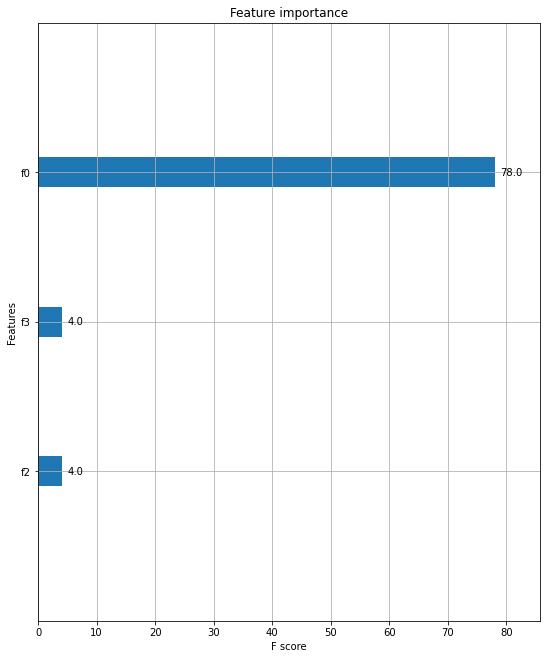

In [7]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,11))
plot_importance(xgb_wrapper, ax)

In [30]:
total_data = pd.read_csv("C:/Users/gimm7/OneDrive/바탕 화면/modified_link.csv")
x_f = total_data.loc[:,['경찰서', 'cctv', '가로등', '보안등']]
colunms = x_f.columns.to_list()


#표준 정규화
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
x_f = scaler.fit_transform(x_f)
x_f = pd.DataFrame(x_f, columns=colunms)

# 예측 확률
pred_proba = xgb_wrapper.predict(x_f)
# 예측 분류
preds = [1 if x > 0.5 else 0 for x in pred_proba]

preds = pd.DataFrame(preds, columns=["위험도"])
total_data = pd.concat([total_data, preds], axis=1)
total_data.drop(['공원','골목상권','공공체육시설','공동주택', '노인복지시설', '녹지', '비상급수시설','지역아동센터','청소년공부방','어린이놀이시설'], axis=1, inplace=True)
total_data.to_csv("C:/Users/gimm7/OneDrive/바탕 화면/prediction_link.csv")